In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data=pd.read_csv(r'employee_data.csv')
data.head()

,EmployeeID,Age,Gender,Department,JobRole,MonthlyIncome,YearsAtCompany,WorkLifeBalance,JobSatisfaction,Attrition
0,1001,53,Female,Finance,Executive,32102.13,0,4,1,No
1,1002,33,Male,HR,Executive,61609.87,1,2,4,Yes
2,1003,39,Female,Finance,Executive,46886.87,6,4,4,No
3,1004,28,Female,Sales,Executive,37200.25,13,2,2,No
4,1005,45,Male,Sales,Analyst,61367.89,6,2,2,Yes


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   EmployeeID       200 non-null    int64  
 1   Age              200 non-null    int64  
 2   Gender           200 non-null    object 
 3   Department       200 non-null    object 
 4   JobRole          200 non-null    object 
 5   MonthlyIncome    200 non-null    float64
 6   YearsAtCompany   200 non-null    int64  
 7   WorkLifeBalance  200 non-null    int64  
 8   JobSatisfaction  200 non-null    int64  
 9   Attrition        200 non-null    object 
dtypes: float64(1), int64(5), object(4)
memory usage: 15.8+ KB


In [4]:
data.describe()

,EmployeeID,Age,MonthlyIncome,YearsAtCompany,WorkLifeBalance,JobSatisfaction
count,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000
mean,1100.500000,40.235000,49122.395900,7.020000,2.445000,2.595000
std,57.879185,10.718873,16799.702925,4.418963,1.150475,1.139062
min,1001.000000,22.000000,10000.000000,0.000000,1.000000,1.000000
25%,1050.750000,31.000000,36682.347500,3.000000,1.000000,2.000000
50%,1100.500000,40.000000,48234.575000,7.000000,2.000000,3.000000
75%,1150.250000,49.250000,60915.422500,11.000000,3.250000,4.000000
max,1200.000000,59.000000,87382.180000,14.000000,4.000000,4.000000


In [6]:
data.columns

Index(['EmployeeID', 'Age', 'Gender', 'Department', 'JobRole', 'MonthlyIncome',
       'YearsAtCompany', 'WorkLifeBalance', 'JobSatisfaction', 'Attrition'],
      dtype='object')

In [10]:
data.dtypes

EmployeeID           int64
Age                  int64
Gender              object
Department          object
JobRole             object
MonthlyIncome      float64
YearsAtCompany       int64
WorkLifeBalance      int64
JobSatisfaction      int64
Attrition           object
dtype: object

In [12]:
data.dtypes.to_frame("Data Types")

,Data Types
EmployeeID,int64
Age,int64
Gender,object
Department,object
JobRole,object
MonthlyIncome,float64
YearsAtCompany,int64
WorkLifeBalance,int64
JobSatisfaction,int64
Attrition,object


In [16]:
data.sample(10)

,EmployeeID,Age,Gender,Department,JobRole,MonthlyIncome,YearsAtCompany,WorkLifeBalance,JobSatisfaction,Attrition
120,1121,23,Female,IT,Manager,33610.37,13,2,3,No
100,1101,27,Female,Sales,Manager,34535.20,6,4,3,No
25,1026,31,Male,Finance,Clerk,39679.45,7,3,3,No
196,1197,29,Female,Finance,Clerk,44781.82,13,1,3,No
142,1143,39,Male,Marketing,Manager,60884.95,7,1,3,No
15,1016,30,Female,Finance,Analyst,82936.26,9,4,4,Yes
82,1083,56,Female,Finance,Clerk,69982.68,8,4,1,No
175,1176,56,Female,HR,Clerk,41554.32,10,3,4,Yes
77,1078,59,Male,HR,Manager,80568.79,9,4,4,No
42,1043,55,Male,Sales,Clerk,47173.49,3,2,2,No


In [14]:
data.isnull().sum()

EmployeeID         0
Age                0
Gender             0
Department         0
JobRole            0
MonthlyIncome      0
YearsAtCompany     0
WorkLifeBalance    0
JobSatisfaction    0
Attrition          0
dtype: int64

In [18]:
attrition_by_department = data[data['Attrition'] =='Yes'].groupby("Department").size().reset_index(name = 'Attrition Count')
attrition_by_department

,Department,Attrition Count
0,Finance,7
1,HR,14
2,IT,8
3,Marketing,8
4,Sales,13


# Attrition by Department

Text(0.5, 1.0, 'Attrition Count by Department')

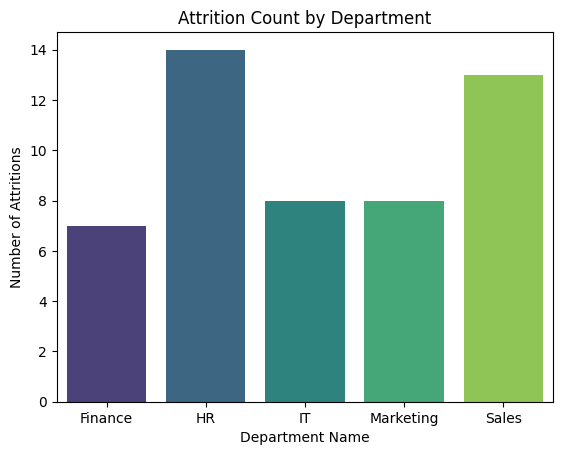

In [55]:
sns.barplot(data=attrition_by_department, x="Department", y="Attrition Count", palette='viridis')
plt.xlabel("Department Name")
plt.ylabel("Number of Attritions")
plt.title("Attrition Count by Department")

# Monthly Income Distribution

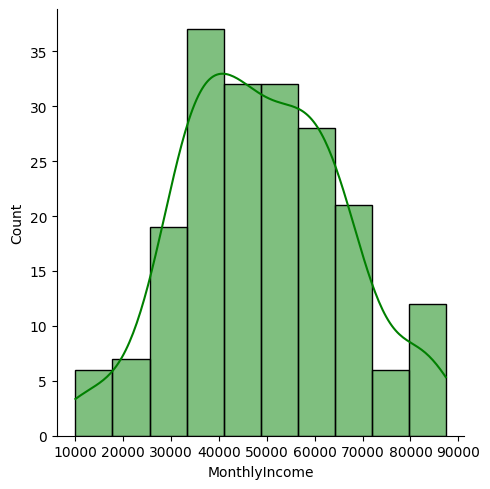

In [54]:
sns.displot(data['MonthlyIncome'],kde = True, color='Green')
plt.show()

Text(0.5, 1.0, 'Income Distribution by Attrition Status')

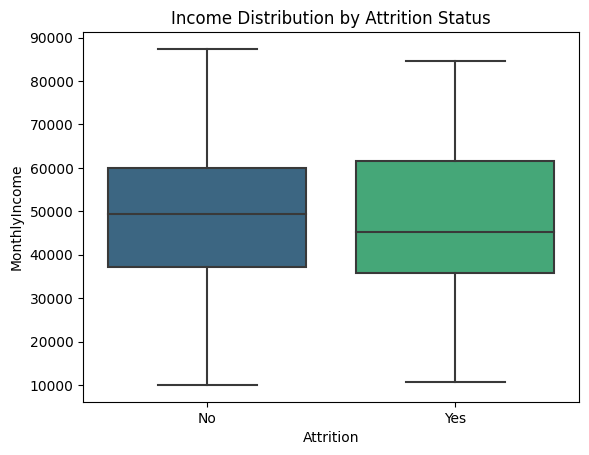

In [56]:
data[['MonthlyIncome', 'Attrition']].head()
data['AttritionFlag'] = data['Attrition'].map({'Yes': 1, 'No': 0})
sns.boxplot(x='Attrition', y='MonthlyIncome', data=data, palette='viridis')
plt.title("Income Distribution by Attrition Status")

In [33]:
correlation = data['MonthlyIncome'].corr(data['AttritionFlag'])
print(f"Correlation between Monthly Income and Attrition: {correlation:.2f}")

Correlation between Monthly Income and Attrition: -0.05


The value is negative it suggests lower income is associated with higher attrition.

In [34]:
# Average income for those who left vs. stayed
income_by_attrition = data.groupby('Attrition')['MonthlyIncome'].mean()
print(income_by_attrition)

Attrition
No     49620.322733
Yes    47628.615400
Name: MonthlyIncome, dtype: float64


Text(0.5, 1.0, 'Average Income by Attrition Status')

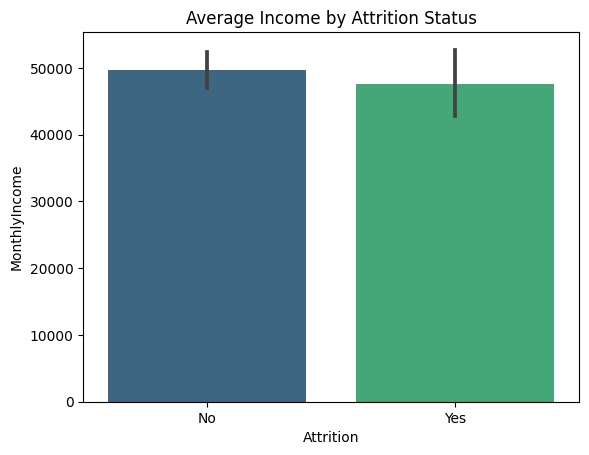

In [57]:
sns.barplot(x='Attrition', y='MonthlyIncome', data=data, estimator='mean', palette='viridis')
plt.title("Average Income by Attrition Status")

# Job Satisfaction vs Attrition

In [37]:
# Calculate attrition rate by satisfaction
attrition_rate = data.groupby('JobSatisfaction')['AttritionFlag'].mean().reset_index()
attrition_rate

,JobSatisfaction,AttritionFlag
0,1,0.204545
1,2,0.166667
2,3,0.219512
3,4,0.377049


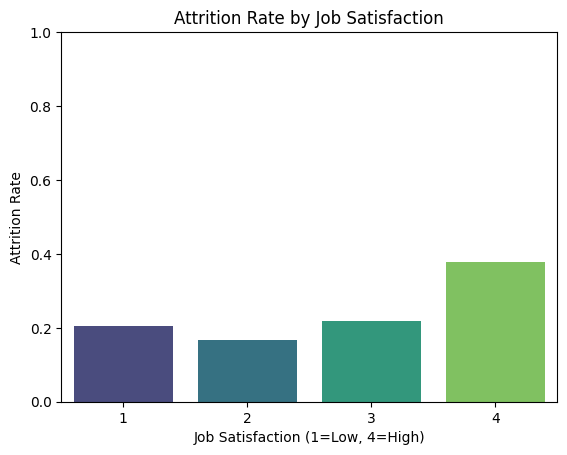

In [58]:
sns.barplot(x='JobSatisfaction', y='AttritionFlag', data=attrition_rate, palette='viridis')
plt.title('Attrition Rate by Job Satisfaction')
plt.ylabel('Attrition Rate')
plt.xlabel('Job Satisfaction (1=Low, 4=High)')
plt.ylim(0, 1)
plt.show()

In [41]:
ct = pd.crosstab(data['JobSatisfaction'], data['Attrition'])
print(ct)

Attrition        No  Yes
JobSatisfaction         
1                35    9
2                45    9
3                32    9
4                38   23


In [42]:
ct_percent = pd.crosstab(data['JobSatisfaction'], data['Attrition'], normalize='index') * 100
print(ct_percent)

Attrition               No        Yes
JobSatisfaction                      
1                79.545455  20.454545
2                83.333333  16.666667
3                78.048780  21.951220
4                62.295082  37.704918


# Attrition vs Years at Company

Text(0.5, 1.0, 'Attrition Rate by Years at Company')

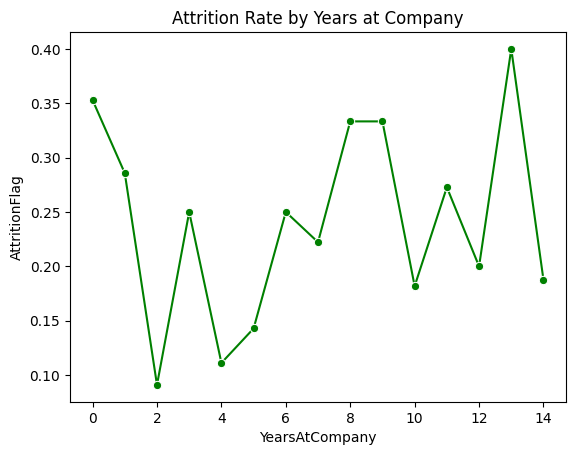

In [51]:
# Calculate attrition rate for each tenure value
tenure_attrition = data.groupby('YearsAtCompany')['AttritionFlag'].mean().reset_index()
sns.lineplot(x='YearsAtCompany', y='AttritionFlag', data=tenure_attrition, marker='o',color='Green' )
plt.title('Attrition Rate by Years at Company')

# Gender-Based Attrition

In [45]:
gender_attrition = data.groupby('Gender')['AttritionFlag'].mean().reset_index()
print(gender_attrition)

   Gender  AttritionFlag
0  Female       0.259259
1    Male       0.239130


Text(0.5, 1.0, 'Attrition Rate by Gender')

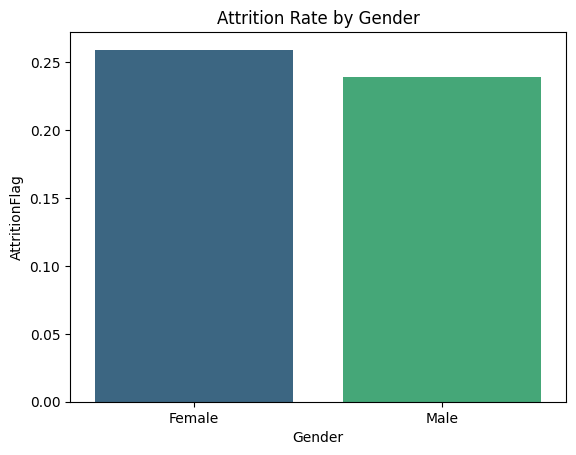

In [59]:
sns.barplot(x='Gender', y='AttritionFlag', data=gender_attrition, palette='viridis')
plt.title('Attrition Rate by Gender')

# Income vs Work-Life Balance

Text(0.5, 1.0, 'Monthly Income by Work-Life Balance Level')

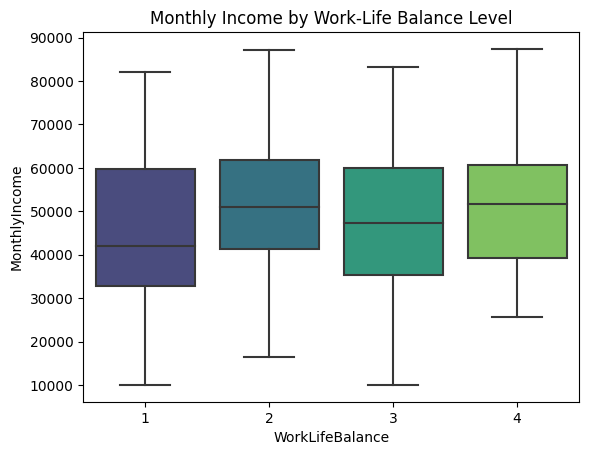

In [60]:
sns.boxplot(x='WorkLifeBalance', y='MonthlyIncome', data=data, palette='viridis')
plt.title('Monthly Income by Work-Life Balance Level')

Text(0.5, 1.0, 'Average Income by Work-Life Balance Level')

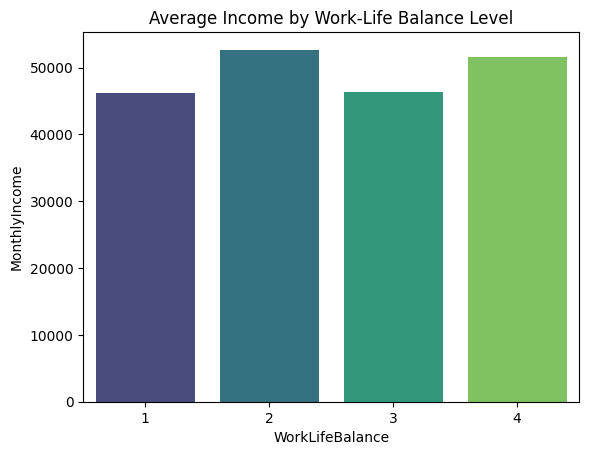

In [49]:
avg_income = data.groupby('WorkLifeBalance')['MonthlyIncome'].mean().reset_index()
sns.barplot(x='WorkLifeBalance', y='MonthlyIncome', data=avg_income, palette='viridis')
plt.title('Average Income by Work-Life Balance Level')

In [50]:
correlation = data['MonthlyIncome'].corr(data['WorkLifeBalance'])
print(f"Correlation between Income and Work-Life Balance: {correlation:.2f}")

Correlation between Income and Work-Life Balance: 0.07


# Attrition Analysis – Key Conclusions

1. Department with Highest Attrition:
The HR department experienced the highest attrition among all departments. This indicates possible departmental issues such as high workload, low morale, or lack of advancement opportunities that may need immediate attention.

2. Impact of Job Satisfaction and Work-Life Balance:
The analysis clearly shows that employees with low job satisfaction and poor work-life balance are significantly more likely to leave the company. Attrition rates were highest among those rating job satisfaction as 1 (Low) and work-life balance as 1 or 2 (Poor to Average). This suggests that employee engagement and work-life programs are critical retention levers.

3. At-Risk Employee Segments:
The segments most at risk of attrition include:

Employees with less than 2 years at the company

Lower-income employees

Employees in low job satisfaction categories

Certain departments (e.g., Sales, if applicable) with high pressure or turnover culture

Possibly female employees, if the gender-based analysis showed a disparity

# Recommendation

To reduce attrition, focus on:

Improving job satisfaction through recognition, feedback, and career growth

Enhancing work-life balance with flexible policies

Targeted retention programs for new joiners and vulnerable departments

